In [1]:
import os.path as osp
import pickle

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fname = osp.join('task6.pkl')
with open(fname, 'rb') as fin:
    data = pickle.load(fin)
data.keys()

dict_keys(['g', 'dijkstra', 'bf', 'grid', 'astar'])

# Dijkstra vs Bellman-Ford

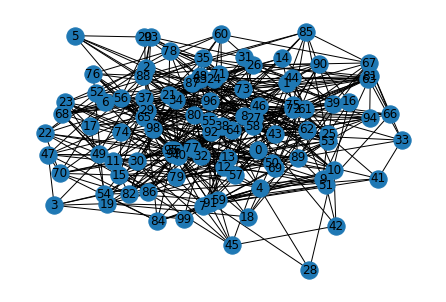

In [3]:
pos = nx.spring_layout(data['g'], iterations=10000)
nx.draw(data['g'], pos, with_labels=True)

In [4]:
df_dijkstra = pd.DataFrame(data['dijkstra'])
df_bf = pd.DataFrame(data['bf'])
df_dijkstra['vertices'] = df_dijkstra['vertices'].map(str)
df_bf['vertices'] = df_bf['vertices'].map(str)
df = pd.merge(df_dijkstra, df_bf, left_on='vertices', right_on='vertices', suffixes=('_dijkstra', '_bf'))
df

,vertices,path_dijkstra,path_len_dijkstra,time_dijkstra,path_bf,path_len_bf,time_bf
0,"[0, 1]","[0, 1]",2,0.000186,"[0, 1]",2,0.014089
1,"[0, 2]","[0, 1, 85, 53, 2]",5,0.003940,"[0, 1, 85, 53, 2]",5,0.015051
2,"[0, 3]","[0, 1, 84, 54, 3]",5,0.004917,"[0, 1, 84, 54, 3]",5,0.014871
3,"[0, 4]","[0, 27, 16, 28, 4]",5,0.003858,"[0, 27, 16, 28, 4]",5,0.013954
4,"[0, 5]","[0, 1, 85, 53, 2, 5]",6,0.003796,"[0, 1, 85, 53, 2, 5]",6,0.013550
...,...,...,...,...,...,...,...
4945,"[96, 98]","[96, 91, 26, 98]",4,0.000973,"[96, 91, 26, 98]",4,0.011108
4946,"[96, 99]","[96, 55, 30, 99]",4,0.003243,"[96, 55, 30, 99]",4,0.011250
4947,"[97, 98]","[97, 76, 29, 98]",4,0.002153,"[97, 76, 29, 98]",4,0.009951
4948,"[97, 99]","[97, 37, 96, 55, 30, 99]",6,0.007006,"[97, 37, 96, 55, 30, 99]",6,0.009603


In [5]:
non_equal = df[df['path_len_dijkstra'] != df['path_len_bf']]
non_equal

,vertices,path_dijkstra,path_len_dijkstra,time_dijkstra,path_bf,path_len_bf,time_bf


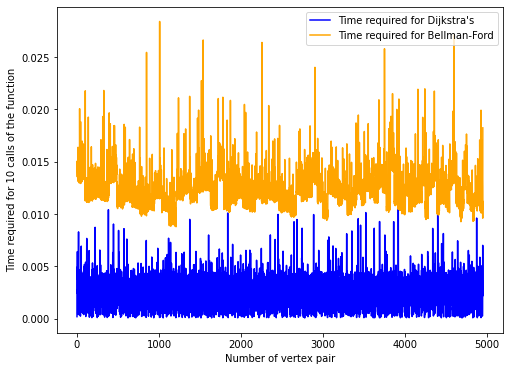

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(df.shape[0]), df['time_dijkstra'], color='blue', label='Time required for Dijkstra\'s')
plt.plot(np.arange(df.shape[0]), df['time_bf'], color='orange', label='Time required for Bellman-Ford')
plt.xlabel('Number of vertex pair')
plt.ylabel('Time required for 10 calls of the function')
plt.legend();

# A* algorithm

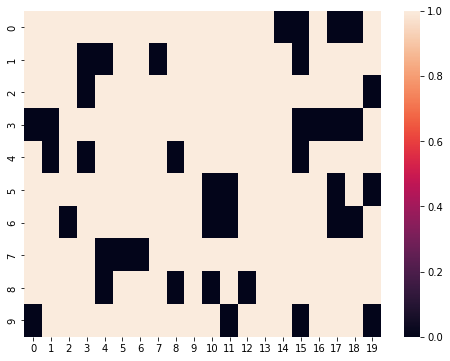

In [9]:
matrix = np.zeros((10, 20), dtype=int)
for v in list(data['grid'].nodes()):
    matrix[v] = 1

plt.figure(figsize=(8, 6))
sns.heatmap(matrix);

In [10]:
df_a = pd.DataFrame(data['astar'])

In [11]:
df_a.sort_values('path_len', ascending=False).head()

,vertices,path,path_len,time
142,"[(0, 0), (8, 19)]","[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2...",28,0.006146
109,"[(0, 0), (6, 19)]","[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2...",28,0.005707
2392,"[(0, 19), (8, 0)]","[(0, 19), (1, 19), (1, 18), (2, 18), (2, 17), ...",28,0.005366
2408,"[(0, 19), (9, 1)]","[(0, 19), (1, 19), (1, 18), (2, 18), (2, 17), ...",28,0.006039
158,"[(0, 0), (9, 18)]","[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2...",28,0.004744


In [12]:
df_a.sort_values('time', ascending=False).head()

,vertices,path,path_len,time
11947,"[(7, 12), (8, 0)]","[(7, 12), (7, 11), (7, 10), (7, 9), (6, 9), (6...",16,0.019141
6999,"[(3, 4), (6, 19)]","[(3, 4), (4, 4), (5, 4), (6, 4), (6, 5), (6, 6...",21,0.012770
10514,"[(5, 15), (6, 4)]","[(5, 15), (6, 15), (7, 15), (7, 14), (7, 13), ...",15,0.012629
3928,"[(1, 13), (9, 3)]","[(1, 13), (2, 13), (3, 13), (4, 13), (5, 13), ...",19,0.011573
6424,"[(2, 16), (5, 0)]","[(2, 16), (2, 15), (2, 14), (3, 14), (4, 14), ...",20,0.010946
